In [1]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Reading files

dftr = pd.read_csv("data/train.csv")
dftest = pd.read_csv("data/test.csv")
dftr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dftr.describe( include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Smith, Mr. James Clinch",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


891 total passengers in train file.

Missing values in Age, Cabin and Embarked columns. 


In [4]:
dftest.describe( include = "all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Warren, Mr. Charles William",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [5]:
#drop Cabin since there are over 600 missing values
#drop Name, Ticket and Embarked which are not meaningful features in prediction
dftr.drop(['Cabin','Name','Ticket','Embarked'], axis=1,inplace=True)
dftest.drop(['Cabin','Name','Ticket','Embarked'], axis=1,inplace=True)

In [6]:
#change gender to code, female=1 and male =0
dftr['Sex'] = dftr['Sex'].apply(lambda x: "1" if x=="female" else "0")
dftest['Sex'] = dftest['Sex'].apply(lambda x: "1" if x=="female" else "0")

In [7]:
#fillin missing values in Age
dftr['Age'] = dftr['Age'].fillna(np.mean(dftr['Age'])).astype(int)
dftest['Age'] = dftest['Age'].fillna(np.mean(dftest['Age'])).astype(int)

In [8]:
#fillin missing values in Fare
dftest['Fare'] = dftest['Fare'].fillna(np.mean(dftest['Fare']))

In [9]:
# Combine Parch & SibSp as Family, family =1 means there are family members
dftr['Family'] =  dftr["Parch"] + dftr["SibSp"]
dftr['Family'] = dftr['Family'].apply(lambda x: "1" if x > 0 else "0")
dftr.drop(['Parch','SibSp'], axis=1,inplace=True)

dftest['Family'] =  dftest["Parch"] + dftest["SibSp"]
dftest['Family'] = dftest['Family'].apply(lambda x: "1" if x > 0 else "0")
dftest.drop(['Parch','SibSp'], axis=1,inplace=True)

In [10]:
dftr.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Family
0,1,0,3,0,22,7.2500,1
1,2,1,1,1,38,71.2833,1
2,3,1,3,1,26,7.9250,0
3,4,1,1,1,35,53.1000,1
4,5,0,3,0,35,8.0500,0


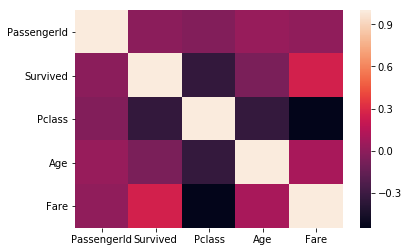

In [11]:
#visualization

#heatmap
correlation = dftr.corr()
sns.heatmap(correlation, xticklabels = correlation.columns.values, yticklabels = correlation.columns.values)


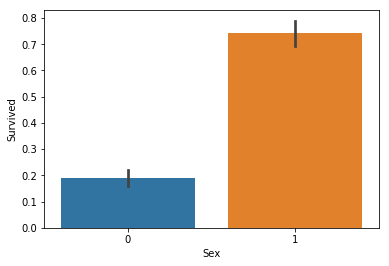

In [12]:
#Survival by gender
sns.barplot(x="Sex", y="Survived", data=dftr)

Female passenger has higher chance to survive 

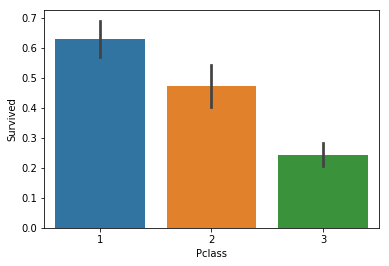

In [13]:
#Survival by class
sns.barplot(x="Pclass", y="Survived", data=dftr)

Passenger in top class has higher chance to survive 

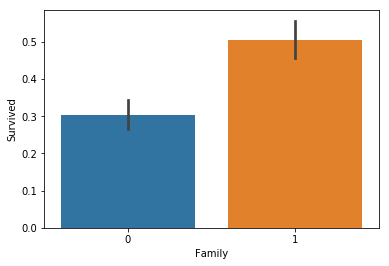

In [14]:
#Survival by Family
sns.barplot(x="Family", y="Survived", data=dftr)

Passenger with family member has higher chance to survive

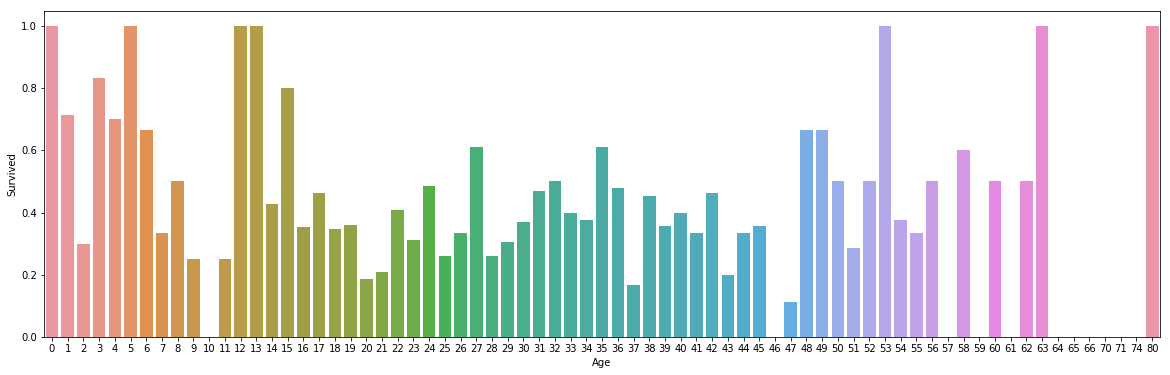

In [15]:
#survival by age
fig, axis1 = plt.subplots(1,1,figsize=(20,6))
avg_age = dftr[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x="Age", y="Survived", data=avg_age)

Passenger in younger age has higher chance to survive 

In [16]:
# create features list
features = ['Pclass','Sex','Age','Fare','Family']
print(dftr[features].head())

   Pclass Sex  Age     Fare Family
0       3   0   22   7.2500      1
1       1   1   38  71.2833      1
2       3   1   26   7.9250      0
3       1   1   35  53.1000      1
4       3   0   35   8.0500      0


In [17]:
#modeling

X_train = dftr[features]
Y_train = dftr["Survived"]
X_test  = dftest.drop(["PassengerId"],axis=1).copy()


In [18]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred_lr = logreg.predict(X_test)
logreg.score(X_train, Y_train)


0.79573512906846244

In [19]:
#correlation coefficient
coeff= pd.DataFrame(dftr.columns[2:])
coeff.columns = ['Features']
coeff["Coefficient"] = pd.Series(logreg.coef_[0])
coeff

,Features,Coefficient
0,Pclass,-1.029253
1,Sex,2.518924
2,Age,-0.028857
3,Fare,0.001657
4,Family,-0.040381


In [20]:
#Random forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)
rf.score(X_train, Y_train)

0.97643097643097643

[ 0.09296598  0.27820132  0.28408425  0.32519587  0.01955258]
['Pclass', 'Sex', 'Age', 'Fare', 'Family']


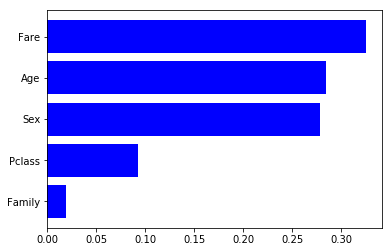

In [21]:
#looks like a good score
#rf feature importance
importance = rf.fit(X_train, Y_train).feature_importances_
print(importance)
print(features)
order = np.argsort(importance)
rank = order.argsort()
plt.barh(rank,importance,color='b')
plt.yticks(rank,features)
plt.show()

In [22]:
#submission
submission = pd.DataFrame({
        "PassengerId": dftest["PassengerId"],
        "Survived": Y_pred_rf
    })
submission.to_csv('submission.csv', index=False)